In [76]:
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.patheffects as pe
from decimal import Decimal


In [81]:
run_path = r"/netfiles/ciroh/floodplainsData/runs/9/run_metadata.json"
with open(run_path, 'r') as f:
    run_dict = json.loads(f.read())
out_dir = os.path.join(run_dict['analysis_directory'], 'clustering')

# Load results data
results = pd.read_csv(os.path.join(run_dict['analysis_directory'], 'clustering', 'all_data.csv'))
print(len(results))
all_pct = list()
all_cms = list()

2545


In [78]:
c1 = '#32d4e6'
c2 = '#faa319'
background_color = '#f0f0f0'

magnitudes = ['Q2', 'Q10', 'Q50', 'Q100']
durations = ['Short', 'Medium', 'Long']
mag_renames = {'Q2': '0.5AEP', 'Q10': '0.1AEP', 'Q50': '0.02AEP', 'Q100': '0.01AEP'}

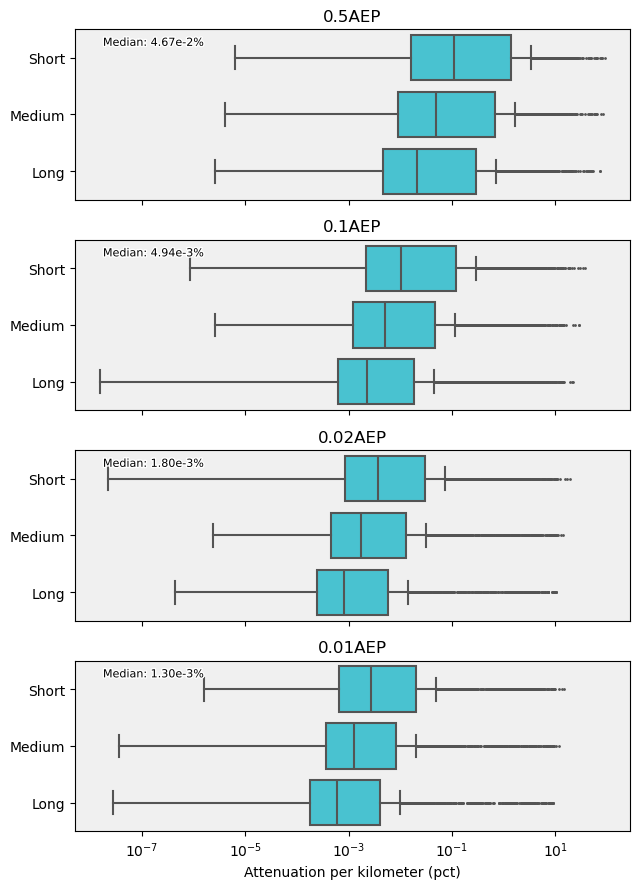

In [79]:
# Percent plot
fig, axs = plt.subplots(nrows=len(magnitudes), figsize=(6.5, 9), sharex=True, sharey=True)

counter = 0
for mag in magnitudes:
    tmp_cols = [f'{mag}_{dur}_pct_attenuation_per_km' for dur in durations]
    tmp_melt = pd.melt(results, value_vars=tmp_cols, var_name='Duration', value_name='Attenuation')
    tmp_melt['Duration'] = tmp_melt['Duration'].str.split('_').str[1]
    tmp_melt['Attenuation'] = tmp_melt['Attenuation'] * 100
    tmp_melt['Attenuation'] = tmp_melt['Attenuation'][tmp_melt['Attenuation'] > 0]
    sns.boxplot(data=tmp_melt, y='Duration', x='Attenuation', ax=axs[counter], color=c1, flierprops={"marker": "o", 'markersize': 1}, showfliers=True)
    axs[counter].set_xscale('log')
    axs[counter].set_title(f'{mag_renames[mag]}')
    axs[counter].set_xlabel('')
    axs[counter].set_ylabel('')
    axs[counter].set_facecolor(background_color)
    tmp_melt['Magnitude'] = mag_renames[mag]
    all_pct.append(tmp_melt)
    median = tmp_melt['Attenuation'].median()
    axs[counter].text(0.05, 0.95, f'Median: {Decimal(median):.2e}%', transform=axs[counter].transAxes, fontsize=8, verticalalignment='top', color='black', path_effects=[pe.withStroke(linewidth=2, foreground='white')])
    counter += 1
    
axs[-1].set_xlabel('Attenuation per kilometer (pct)')

fig.tight_layout()
out_path = os.path.join(run_dict['analysis_directory'], 'clustering', 'final', 'Figure_SI1.png')
fig.savefig(out_path, dpi=400)

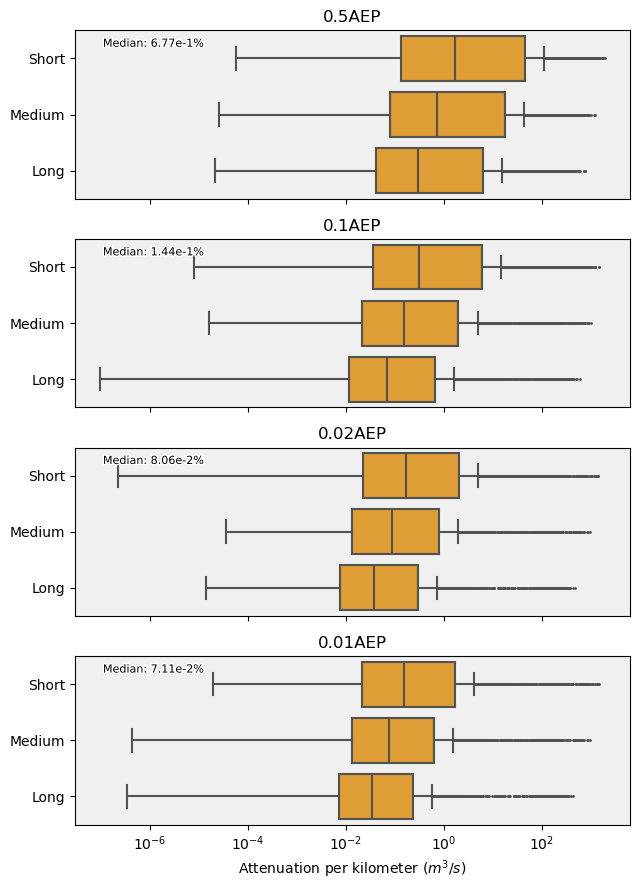

In [80]:
# Cms plot

fig, axs = plt.subplots(nrows=len(magnitudes), figsize=(6.5, 9), sharex=True, sharey=True)

counter = 0
for mag in magnitudes:
    tmp_cols = [f'{mag}_{dur}_cms_attenuation_per_km' for dur in durations]
    tmp_melt = pd.melt(results, value_vars=tmp_cols, var_name='Duration', value_name='Attenuation')
    tmp_melt['Duration'] = tmp_melt['Duration'].str.split('_').str[1]
    tmp_melt['Attenuation'] = tmp_melt['Attenuation'] * 100
    tmp_melt['Attenuation'] = tmp_melt['Attenuation'][tmp_melt['Attenuation'] > 0]
    sns.boxplot(data=tmp_melt, y='Duration', x='Attenuation', ax=axs[counter], color=c2, flierprops={"marker": "o", 'markersize': 1})
    axs[counter].set_xscale('log')
    axs[counter].set_title(f'{mag_renames[mag]}')
    axs[counter].set_xlabel('')
    axs[counter].set_ylabel('')
    axs[counter].set_facecolor(background_color)
    tmp_melt['Magnitude'] = mag_renames[mag]
    all_cms.append(tmp_melt)
    median = tmp_melt['Attenuation'].median()
    axs[counter].text(0.05, 0.95, f'Median: {Decimal(median):.2e}%', transform=axs[counter].transAxes, fontsize=8, verticalalignment='top', color='black', path_effects=[pe.withStroke(linewidth=2, foreground='white')])
    counter += 1
    
axs[-1].set_xlabel(r'Attenuation per kilometer (${m}^{3}/s$)')
fig.tight_layout()
out_path = os.path.join(run_dict['analysis_directory'], 'clustering', 'final', 'Figure_SI2.png')
fig.savefig(out_path, dpi=400)